In [2]:
import SimFunctions
import SimRNG 
import SimClasses
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad
from scipy.special import gamma
from pprint import pprint

# OED solver for Virtual Waiting Time and Mortality

Defining $\rho_k(t)=\frac{\lambda_k(t)}{\mu_k(t)}$ to be the offered load of the $k$th job class at the time $t$ for $k= 1...K$.  
Assumption (A1). For each job class $k \in \{1,...,K\}$, the deadline distribution $F_k$ is continuous. Furthermore, $F_k(t) = 0 \, \forall t \leq 0$ and $\lim_{t\to\infty} F(t)=1$.  
Consider the unbounded virtual waiting time, $\tilde{W}: \mathbb R^+ \rightarrow \mathbb R$, that can have value less than zero. We may now state the main method to calculate the virtual waiting time, $W(t)$.  
Theorem 1: Under Assumption(A1), if $W(s)$ is the virtual waiting time at the time $s$, and $\tilde{W}(t)$ is monotomic in the interval $[s,u]$, then $\tilde{W}(t)$ is the unique solution of 
$$
\begin{cases}
\tilde{W}'(t)=-1+\sum_{k}\rho_k(t)G_k(\tilde{W}(t)) \\
\tilde{W}(0) = W(s)
\end{cases}
$$
Also, the virtual waiting time in the intervial $[s,u]$ is
$$W(t) = max(0, \tilde{W}(t))$$

$\lambda(t)=
\begin{cases}
\frac{1}{50}t & \text{if } 0 \leq t < 100 \\
-\frac{1}{50}(t-200) & \text{if } 100\leq t < 200 \\
\frac{1}{50}(t-300) & \text{if } 300 \leq t < 400 \\
-\frac{1}{50}(t-500) & \text{if } 400\leq t < 500 \\
0 & \text{otherwise}
\end{cases}$  
Because $\Lambda(t)=\int_{0}^{t}\lambda(t)$,  
$\Lambda(t)=
\begin{cases}
\frac{1}{100}t^2 & \text{if } 0 \leq t < 100 \\
-\frac{1}{100}(t-200)^2+200 & \text{if } 100\leq t < 200 \\
200 & \text{if } 200 \leq t < 300 \\
\frac{1}{100}(t-300)^2 + 200 & \text{if } 300 \leq t < 400 \\
-\frac{1}{100}(t-500)^2 + 400 & \text{if } 400\leq t < 500 \\
400 & \text{if } t \geq 500
\end{cases}$  
Let $\Lambda^{-1}(t)$ be the inverse of $\Lambda(t)$  
$\Lambda^{-1}(t)=
\begin{cases}
10\sqrt{t} & \text{if } 0 \leq t < 100 \\
-10\sqrt{-t+200}+200 & \text{if } 100\leq t < 200 \\
10\sqrt{t-200}+300 & \text{if } 200 < t < 300 \\
-10\sqrt{-t+400}+500 & \text{if } 300 \leq t < 400 
\end{cases}$

# Arrival Rate Plot

In [36]:
def arrivalRatePlot(x_range, y_range, arrivalRate, cumArrivalRate, arrivalRateInverse):
    t = np.linspace(0,x_range,x_range+1)
    arrivalRate = np.vectorize(arrivalRate)
    cumArrivalRate = np.vectorize(cumArrivalRate)
    arrivalRateInverse = np.vectorize(arrivalRateInverse)
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    axs[0].plot(t, arrivalRate(t), '-', label='lambda(t)')
    axs[1].plot(t, cumArrivalRate(t), '-', label='Lambda(t)')
    t = np.linspace(0,y_range, y_range+1)
    axs[1].plot(t, arrivalRateInverse(t), '-', label='Lambda^-1(t)')

    plt.legend()
    plt.show()

# Carmel Arrival Rate

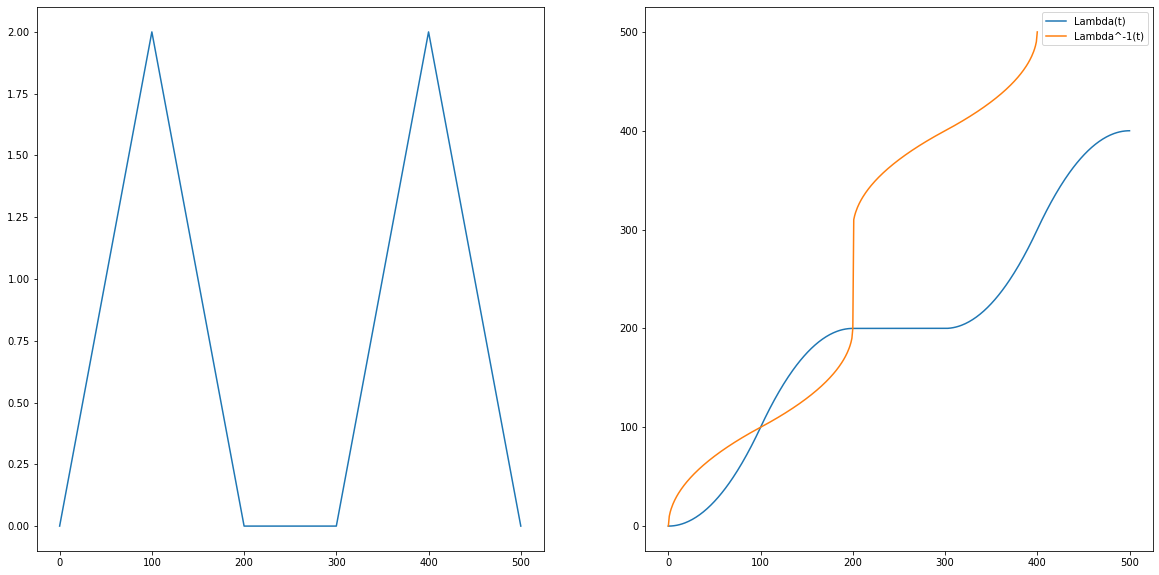

In [71]:
def carmelArrivalRate(t):
    if t<100:
        return 1/50 * t
    elif 100<=t <= 200:
        return -1/50 *(t - 200)
    elif 300<t<400:
        return 1/50 * (t-300)
    elif 400<=t<500:
        return -1/50 *(t- 500)
    else:
        return 0

def carmelCumArrivalRate(t):
    if t < 100:
        return 1/100*t**2
    elif 100<=t<200:
        return -1/100 *(t-200)**2 + 200
    elif 200<=t<300:
        return 200
    elif 300<=t<400:
        return 1/100*(t-300)**2 + 200
    elif 400<=t<500:
        return -1/100 *(t-500)**2 + 400
    else:
       return 400

def carmelArrivalRateInverse(t):
    if t<100:
        return 10*np.sqrt(t)
        #y=1/100t^2
        #100t
    elif 100<=t<=200:
        return -10*np.sqrt(-t+200)+200
        #-1/100*t**2+4*t-200
    elif 200<t<300:
        return 10*np.sqrt(t-200)+300
        #y=1/100(t-300)^2 + 200
    elif 300<=t<=400:
        return -10*np.sqrt(-t+400)+500
arrivalRatePlot(500, 400, carmelArrivalRate, carmelCumArrivalRate, carmelArrivalRateInverse)

# Concave Arrival Rate

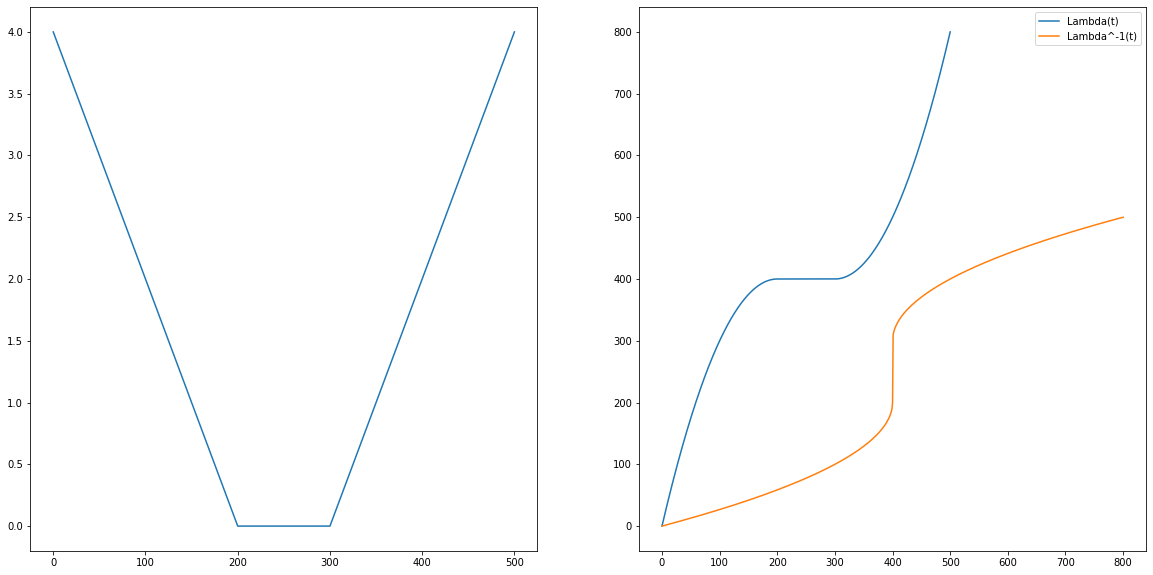

In [37]:
def concaveArrivalRate(t):
    if t <200:
        return -1/50 *(t - 200)
    elif 300<t<=500:
        return 1/50 * (t-300)
    else:
        return 0

def concaveCumArrivalRate(t):
    if t<200:
        return -1/100 *(t-200)**2 +400
    elif 200<=t<300:
        return 400
    elif 300<=t<=500:
        return 1/100*(t-300)**2 + 400
    else:
       return 800

def concaveArrivalRateInverse(t):
    if t<=400:
        return -10*np.sqrt(-t+400)+200
        #-1/100*t**2+4*t-200
    elif 400<t<=800:
        return 10*np.sqrt(t-400)+300
        #y=1/100(t-300)^2 + 200
arrivalRatePlot(500, 800, concaveArrivalRate, concaveCumArrivalRate, concaveArrivalRateInverse)

In [114]:
def ExpoCDF(t, rate):
    if t<0:
      return 1
    return np.exp(-rate*t)

def thinningArrivalRate(prob, arrivalRate):
    def Lambda_k(t):
        Lambda = arrivalRate(t)
        return Lambda*prob
    return Lambda_k


def Mu_k(t):
    return np.array([1,1])

def VW_model(z, t, Lambda, Mu, Gamma, CDF):
    #print(prev_w, prev_t)
    w, m = z
    Gs = np.array([CDF(w, g) for g in Gamma])
    Fs = 1 - Gs
    Lambdas = Lambda(t)
    rhos = Lambdas/Mu(t)
    dwdt = -1 + np.sum(rhos*Gs)
    dmdt = np.sum(Fs*Lambdas.T, axis=0)
    return [dwdt, dmdt]

def model(z, t, Lambda, Mu, Gamma, CDF):
    w, m = z
    Gs = np.array([CDF(w, g) for g in Gamma])
    Fs = 1 - Gs
    Lambdas = Lambda(t)
    rhos = Lambdas/Mu(t)
    dwdt = -1 + np.sum(rhos*Gs)
    dmdt = np.sum(Fs*Lambdas.T, axis=0)
    return [dwdt, dmdt]


def mortality_model(waits, t, G, gammas, arrivalRate, p_join):
    CDF = np.vectorize(G)
    Gs = np.array([CDF(waits, g) for g in gammas])
    Fs = 1 - Gs
    AR = np.vectorize(arrivalRate)
    Lambdas = AR(t).reshape(-1,1)*p_join
    return np.cumsum(np.sum(Fs*Lambdas.T, axis=0))

def mortality_mistrage_relation(overtriage, undertriage, Class1Prob, arrivalRate, Mu_k, abandonMeans, X, T):
    # P(X=1), P(X=2)
    p_X = np.array([Class1Prob, 1-Class1Prob])
    # P(T=1|X=1), P(T=1|X=2)
    p_condition = np.array([1-undertriage, overtriage])
    # P(T=1, X=1), P(T=1, X=2)
    p_join = p_X * p_condition
    # lambda_
    Lambda_k = thinningArrivalRate(p_join, arrivalRate)
    #gamma_k
    gammas = 1/np.array(abandonMeans)
    # linspace
    t = np.linspace(0,T,T+1)
    # initial condition
    z0 = [min(X),0]
    # solve ODE
    sol = np.zeros((T+1, 2))
    sol[0] = np.array(z0)
    for i in range(1,T+1):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(VW_model,z0,tspan,args=(Lambda_k, Mu_k, gammas, ExpoCDF))
        # store solution for plotting
        # if the virtual waiting time is less than 0, set it to 0, and set the cumulative death to the previous solution
        if z[1][0] < 0:
            z[1][0] = 0
            z[1][1] = z[0][1]
        
        sol[i] = z[1]
        # next initial condition
        z0 = z[1]
    sol[:, 1] = mortality_model(sol[:, 0], t, ExpoCDF, gammas, arrivalRate, p_join)
    return sol

TODO:
1. Rewrite code, integrate non stationary arrival time
2. Formulate function to math expression

$$\lambda(t)=
\begin{cases}
2 & \text{if } 100 < t \leq 200\\
0.2 & \text{otherwise}\\
\end{cases}$$
Suppose the arrival rate $\lambda(t)$ is non-stationary, and 
let interarrival times $A_1, A_2,...$ be i.i.d samples from a distribution $G$ with bounded rate $\lambda(t)$, i.e. we can express G given $\lambda(t)$.  
Let $G_{\tilde{\lambda}}$ be the base distribution, which is the distribution $G$ with rate $\tilde{\lambda}=max_t \lambda(t)$. If the arrival time of $n-1$ instance, $S_{n-1}$, is given, to generate interarrival time of $n$th instance using thinning method is as follows:  
1. Let $t = S_{n-1}$ keep tracking of the current time
2. Loop    
(a) Generate a potential interarrival time $\tilde{A}$ ~ $G_{\tilde{\lambda}}$ (e.g. using inverse method)  
(b) Update $t = t + \tilde{A}$  
(c) Generate $U$ ~ $U(0,1)$  
until $U \leq \lambda(t)/\tilde{\lambda}$
3. The interarrival time of $n$th instance is $t - S_{n-1}$

In [5]:
class Exponential:
    
    def __init__(self, rate, Stream):
        self.rate = rate
        self.Stream = Stream
    
    def sample(self):
        return SimRNG.Expon(1/self.rate, self.Stream)

# Simulation

In [6]:
def createConstantGenerator(constant, Stream):
    '''
    Create a constant generator, return the given constant and next stream to use
    '''
    def Generator(obj=None):
        return constant
    return Generator, Stream

def createExpoGenerator(Mean, Stream):
    '''
    Create a Exp Generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Expon(Mean, Stream)
    return Generator, Stream + 1 

def createBaseExpoGenerator(Rate, Stream):
    return Exponential(Rate, Stream), Stream + 1

def createErlangGenerator(m, Mean, Stream):
    '''
    Create a normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Erlang(m, Mean, Stream)
    return Generator, Stream + 1

def createNormalGenerator(Mean, Variance, Stream):
    '''
    Create a normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Normal(Mean, Variance, Stream)
    return Generator, Stream + 1 

def createLognormal(MeanPrime, VariancePrime, Stream):
    '''
    Create a log-normal distribution generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Lognormal(MeanPrime, VariancePrime, Stream)
    return Generator, Stream + 1

def createRandom_integerGenetrator(prob_distrib, Stream):
    '''
    Create a random integer generator, return a genetrtor and next stream to use
    '''
    def Generator(obj=None):
        return SimRNG.Random_integer(prob_distrib, Stream)
    return Generator, Stream + 1

def createHyoerExpGenerator(Stream):
    def hyperExp(p, lambda1, lambda2):
        U1 = SimRNG.Uniform(0,1, Stream)
        U2 = SimRNG.Uniform(0,1, Stream+1)
        if U1 <= p:
            return (-1/lambda1) * np.log(U2)
        return (-1/lambda2) * np.log(U2)
    return hyperExp, Stream + 2

In [7]:
def createNSAPInverseMethod(varA, base, arrivalRateInverse, Stream):
    first = True
    p = 0.5*(1+ np.sqrt((varA-1)/(varA+1)))
    lambda1 = 2*p
    lambda2 = 2*(1-p)
    S_tilde = 0
    S_prev = 0
    def NSAP(t):
        nonlocal S_tilde
        nonlocal S_prev
        nonlocal first
        if first:
            A_tilde = base(1/2, lambda1, lambda2)
            first = False
        else:
            A_tilde = base(p, lambda1, lambda2)
        S_tilde += A_tilde
        
        S = arrivalRateInverse(S_tilde)
        if S == None:
            return None
        A = S - S_prev
        S_prev = S
        return A
    return NSAP, Stream


In [104]:
def createNSAPthinningMethod(arrivalRate, base, Stream, fluidScale=1, T=float('inf')):
    def thinningMethod(t):
        S = t
        potentialArrival = base.sample()
        t += potentialArrival
        U = SimRNG.Uniform(0, 1, Stream)
        while t <= T and U > (arrivalRate(t)*fluidScale)/base.rate:
            potentialArrival = base.sample()
            U = SimRNG.Uniform(0, 1, Stream)
            t += potentialArrival
        if t > T:
            return None
        return t - S
    return thinningMethod, Stream+1

In [9]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
def drawVirtalWait(arrivalTime, virtualWaits, jumpTime, ax):
    lines = []
    dashlines = []
    prev = (arrivalTime[0], virtualWaits[0]+jumpTime[0])
    prevA = 0
    prevjump = jumpTime[0]
    for A, Y, X in zip(arrivalTime[1:], virtualWaits[1:], jumpTime[1:]):
        interA = A - prevA
        if interA > prevjump:
            lines.append([prev, (prevA+prevjump, 0)])
            prev = (prevA+prevjump, 0)
        lines.append([prev, (A, Y)])
        jump = Y+X
        prev = (A, jump)
        dashlines.append([(A, Y), (A, jump)])
        prevA = A
        prevjump = jump

    lc = mc.LineCollection(lines, linewidths=2)
    dash = mc.LineCollection(dashlines, colors='red',linestyles='--', linewidths=2)
    ax.add_collection(lc)
    ax.add_collection(dash)
    ax.margins(0.1)
    ax.set_title("Virtual Waiting Time")
    ax.set_xlabel("Time t")
    ax.set_ylabel("W(t)")

def drawCumDeath(arrivalTime, cumdead, ax):
    ax.plot(arrivalTime, cumdead)
    ax.set_title("Death over arrival time")
    ax.set_xlabel("Arrival Time t")
    ax.set_ylabel("Number of Death")
    

For G/G/1 + G,
let $\{A_n|n=1,2,...\}$ be a process of the interarrival times between customers (where A1 is the actual time of the first
arrival). Similarly, let $\{X_n|n=1,2,...\}$ be a process of service times of successive customers, and let $\{\tilde{X}_n| n=1,2,...\}$ be a process of the potential service time of successive customers. If the customer dies before the service, then the actual service time is 0. Also, let $\{D_n|n=1,2,...\}$ be a process of remaining life times of successive customers.Then if Y1,Y2, . . . are the successive virtual waiting times in queue (i.e., the time from customer arrival until service begins), a little thought reveals that
$$Y_n = max(Y_{n-1}+X_{n-1}-A_n, 0)$$
$$X_n = \mathbb 1(Y_n\le D_n) \tilde{X}_n$$
where we need to define $Y_0 = 0$ and $X_0 \geq 0$ to make the recursion work. $X_0$ is the initial occupation time of the server.

For G/G/s + G,
let $X_n = [X_{n,1}, X_{n,2},...,X_{n,s}]$ be an array that tracks of the remaining occupation time for each server at the time when the nth customer just enters the service. 
$$Y_n = max(Y_{n-1}+\min_{j=1,2,..s}(X_{n-1,j})-A_n, 0)$$
$$X_{n,j} = 
\begin{cases}
\mathbb 1(Y_n\le D_n) \tilde{X}_n & \text{if } j=\underset{j=1,2,..s}{\operatorname{argmin}}(X_{n-1,j})\text{ break ties arbitrarily}\\
max(0, X_{n-1, j} - A_{n}) & \text{otherwise}\\
\end{cases}$$
where we need to define $Y_0 = 0, X_{0,j} \geq 0 \, \forall j=1,2,...s$ the recursion still works. $X_{0,j}$ is the initial occupation time of server $j$.


In [10]:
def LindleyWithAbandon(Y, X, A, D, tildeX):
    '''
    Calculate virtual waiting time, remaining occupation time and determine the abandonment

    Args:
        Y: the virtual waiting time of the previous patient
        X: the array of occupation times when the previous patient enters the service
        A: the interaveral time of the current patient
        D: the life remaining time of the current patient
        tildeX: the potential service time of the current patient
    
    Return:
    A tuple of (Y, X, abandon)
        Y: the virtual waiting time of the current patient
        X: the array of occupation times when the current patient enters the service
        abandon: a boolean that determains if the current patient abandons the queue
    '''
    j = np.argmin(X)
    Y = max(Y+X[j]-A, 0)
    abandon = False
    if Y > D:
        tildeX = 0
        abandon = True
    X = np.maximum(X-A, 0)
    X[j] = tildeX
    return Y, X, abandon

In [112]:
# change class type and triage to distribution
def createGenerators(overtriage, undertriage, Class1Prob, abandonMeans, serviceRates, stopTime, fluidScale, arrivalRateInverse=None, arrivalRate=None, maxRate=None,  method='inverse'):
    def patientFn(t):
        interArrivalTime = interArrivalTimeFn(t)
        if interArrivalTime == None:
            return None, None, None
        patientClass = classFn()
        lifeRemaining = abandonFns[patientClass-1]()
        while triageFuns[patientClass-1]() != 1:
            A = interArrivalTimeFn(t+interArrivalTime)
            if A == None:
                return None, None, None
            interArrivalTime += A
            patientClass = classFn()
            lifeRemaining = abandonFns[patientClass-1]()
        return interArrivalTime, lifeRemaining, patientClass
    def serviceTimeFn(info):
        serviceTime = SimRNG.Expon(1/(serviceRates(0)[info-1]*fluidScale), Stream)
        return serviceTime
    Stream = 1
    classFn, Stream = createRandom_integerGenetrator([Class1Prob,1], Stream)
    class1TriageFn, Stream = createRandom_integerGenetrator([1-undertriage,1], Stream)
    class2TriageFn, Stream = createRandom_integerGenetrator([overtriage,1], Stream)
    triageFuns = [class1TriageFn, class2TriageFn]
    abandonFns = []
    for abandonMean in abandonMeans:
        #abandonTimeFn, Stream = createConstantGenerator(abandonMean, Stream)
        abandonTimeFn, Stream = createExpoGenerator(abandonMean, Stream)
        abandonFns.append(abandonTimeFn)
    if method =='inverse':
        base, Stream = createHyoerExpGenerator(Stream)
        interArrivalTimeFn, Stream = createNSAPInverseMethod(1, base, arrivalRateInverse, Stream)
    elif method == 'thinning':
        base = Exponential(maxRate*fluidScale, Stream)
        interArrivalTimeFn, Stream = createNSAPthinningMethod(arrivalRate, base, Stream, fluidScale, stopTime)
    #interArrivalTimeFn, Stream = createConstantGenerator(interArrivalTimeMean, Stream)
    return patientFn, serviceTimeFn

In [12]:
#G/G/s + G
def simulate(X, patientFn, serviceTimeFn, T):
    clock = 0
    Y = 0
    X = np.array(X)
    deadcount = 0
    arrivalTime = [0]
    virtualWaits = [0]
    jumpTime = [np.min(X)]
    cumdead = [0]
    old_clock = 0
    while clock < T:
        A, D, C = patientFn(clock)
        if A == None:
            break
        tildeX = serviceTimeFn(C)
        Y, X, abandon = LindleyWithAbandon(Y, X, A, D, tildeX)
        deadcount += abandon
        old_clock = clock
        clock += A
        arrivalTime.append(clock)
        virtualWaits.append(Y)
        cumdead.append(deadcount)
        jumpTime.append(np.min(X))
    return arrivalTime, virtualWaits, jumpTime, cumdead

In [13]:
#[0,1] 0.5 0, 1
def findClosestArrivalTime(t, arrivalTime):
    low = 0
    high = len(arrivalTime) - 1
    while low <= high:
        mid = (low + high)//2
        if arrivalTime[mid] < t:
            low = mid + 1
        elif arrivalTime[mid] > t:
            high = mid - 1
        else:
            return mid, True
    return high, False

In [14]:
def CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime):
    def VirtualWaitFn(t):
        i, found = findClosestArrivalTime(t, arrivalTime)
        if found:
            return virtualWaits[i]
        else:
            return max(virtualWaits[i] + jumpTime[i] - t + arrivalTime[i], 0)
    VirtualWaitFn = np.vectorize(VirtualWaitFn, otypes=[float])
    return VirtualWaitFn

In [15]:
def CreateCumDeathFn(arrivalTime, cumdead):
    def CumDeathFn(t):
        i, found = findClosestArrivalTime(t, arrivalTime)
        return cumdead[i]
    CumDeathFn = np.vectorize(CumDeathFn, otypes=[float])
    return CumDeathFn
        

In [128]:
overtriage = 0.5
undertriage = 0
Class1Prob = 0.5
abandonMeans = [800, 1200]
X = [0]
T = 500
fluidScale = 100

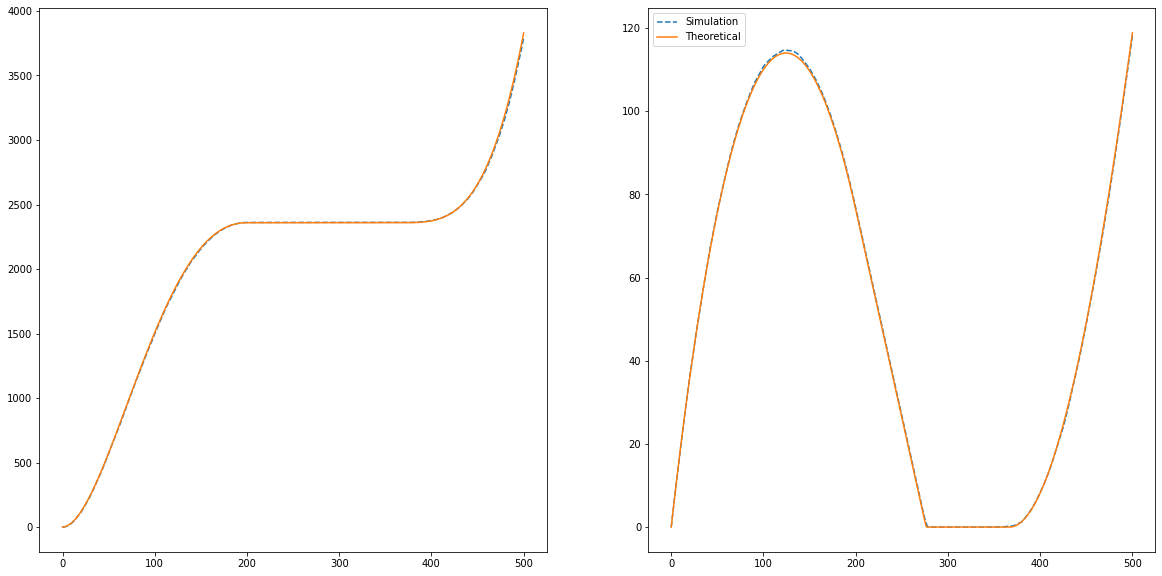

In [129]:

generatorsParams = {"overtriage": overtriage,
                    "undertriage": undertriage, 
                    "Class1Prob": Class1Prob, 
                    "abandonMeans": abandonMeans, 
                    "serviceRates": Mu_k,
                    "stopTime": T,
                    "arrivalRateInverse":concaveArrivalRateInverse, 
                    "arrivalRate": concaveArrivalRate,
                    "maxRate": 4, 
                    "method": 'thinning',
                    "fluidScale":fluidScale}
patientFn, serviceTimeFn = createGenerators(**generatorsParams)
t = np.linspace(0,T,T+1)
expectW = np.zeros_like(t)
expectD = np.zeros_like(t)
fig, axs = plt.subplots(1,2,figsize=(20, 10))

for i in range(10):
    arrivalTime, virtualWaits, jumpTime, cumdead = simulate(X, patientFn, serviceTimeFn, T)
    VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
    CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
    expectW += (VirtualWaitFn(t) - expectW)/(i+1)
    expectD += (CumDeathFn(t) - expectD)/(i+1)
    #drawCumDeath(arrivalTime, cumdead, axs[0])
    #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
axs[0].plot(t, expectD, '--', label='Simulation')
axs[1].plot(t, expectW, '--', label='Simulation')

sol = mortality_mistrage_relation(overtriage, undertriage, Class1Prob, concaveArrivalRate, Mu_k, abandonMeans, X, T)
axs[0].plot(t, sol[:, 1]*fluidScale, '-', label='Theoretical')
axs[1].plot(t, sol[:, 0], '-', label='Theoretical')
plt.legend()
plt.show()

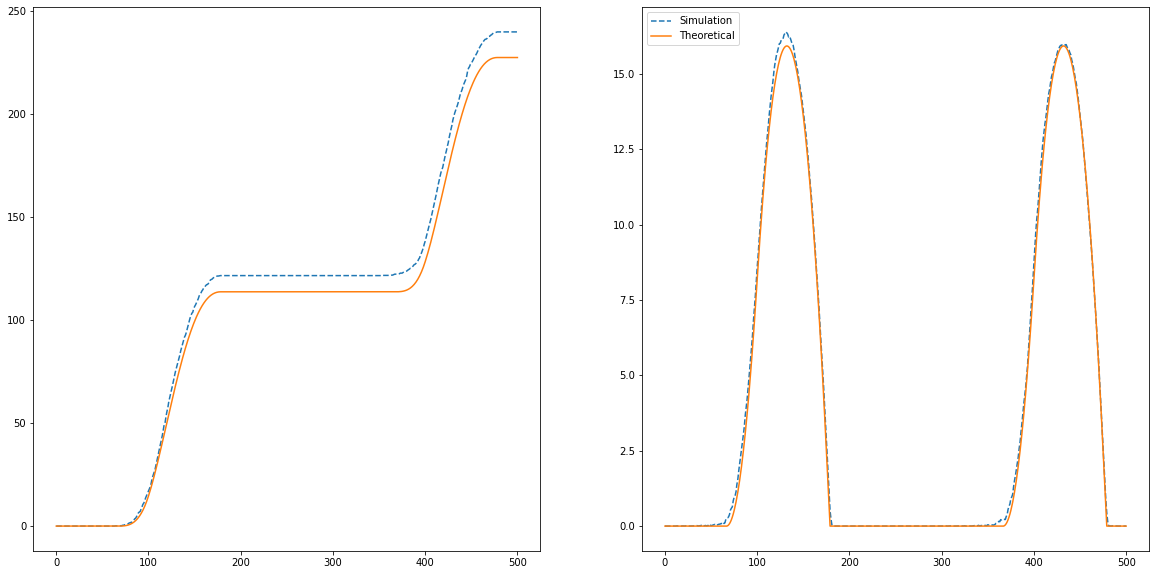

In [130]:
generatorsParams = {"overtriage": overtriage,
                    "undertriage": undertriage, 
                    "Class1Prob": Class1Prob, 
                    "abandonMeans": abandonMeans, 
                    "serviceRates": Mu_k,
                    "stopTime": T,
                    "arrivalRateInverse":carmelArrivalRateInverse, 
                    "arrivalRate": carmelArrivalRate,
                    "maxRate": 2, 
                    "method": 'thinning',
                    "fluidScale":fluidScale}

patientFn, serviceTimeFn = createGenerators(**generatorsParams)
t = np.linspace(0,T,T+1)
expectW = np.zeros_like(t)
expectD = np.zeros_like(t)
fig, axs = plt.subplots(1,2,figsize=(20, 10))

for i in range(10):
    arrivalTime, virtualWaits, jumpTime, cumdead = simulate(X, patientFn, serviceTimeFn, T)
    VirtualWaitFn = CreateVirtualWaitFn(arrivalTime, virtualWaits, jumpTime)
    CumDeathFn = CreateCumDeathFn(arrivalTime, cumdead)
    expectW += (VirtualWaitFn(t) - expectW)/(i+1)
    expectD += (CumDeathFn(t) - expectD)/(i+1)
    #drawCumDeath(arrivalTime, cumdead, axs[0])
    #drawVirtalWait(arrivalTime, virtualWaits, jumpTime, axs[1])
axs[0].plot(t, expectD, '--', label='Simulation')
axs[1].plot(t, expectW, '--', label='Simulation')

sol = mortality_mistrage_relation(overtriage, undertriage, Class1Prob, carmelArrivalRate, Mu_k, abandonMeans, X, T)
axs[0].plot(t, sol[:, 1]*fluidScale, '-', label='Theoretical')
axs[1].plot(t, sol[:, 0], '-', label='Theoretical')
plt.legend()
plt.show()